# Arrays

In [2]:
from pathlib import Path

In [3]:
p = Path('/Users/olli/Desktop/PythonNotebooks')
sub_dir = 'pics'
pics = p/sub_dir
pics

WindowsPath('/Users/olli/Desktop/PythonNotebooks/pics')

## Low level arrays 

* Memory of a computer stored in bits 
* Typical unit is a byte = 8 bits
* Memory address Byte #2144

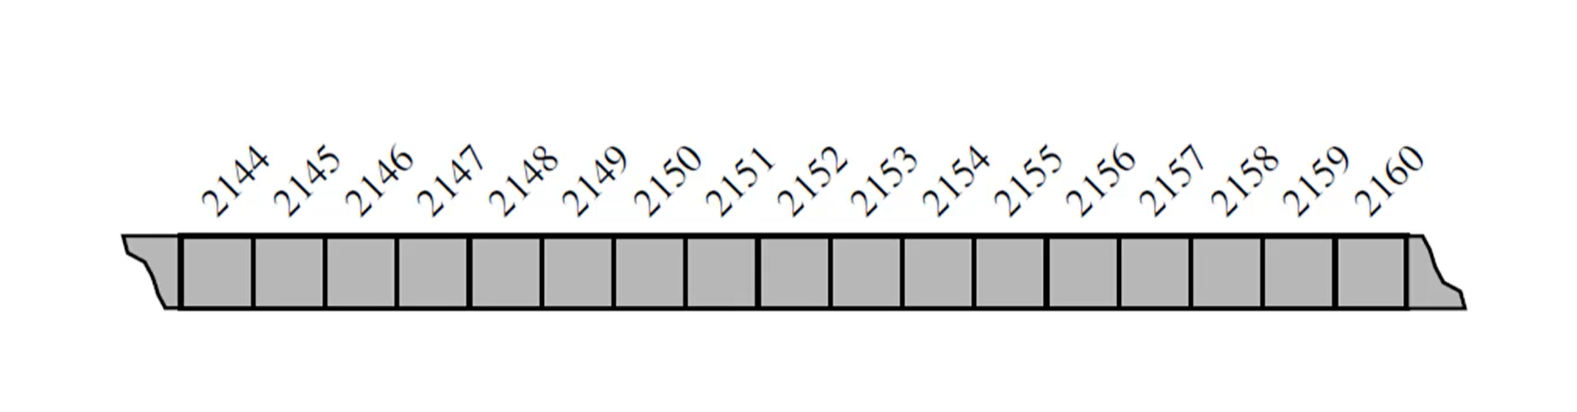

In [4]:
from IPython.display import Image
filename = 'memory.png'
Image(pics/filename)

What is an array ? 
* Computer's main memory performs as Random Access Memory (RAM)
* Individual byte of memory can be stored or retreived in constant time **O(1)**
* A group of related variables can be stored one after the other in a contiguous portion of the computer's memory 
* Such a representation is an **array**

For example python represents each Unicode character in a string with 16 bits or 2 bytes 

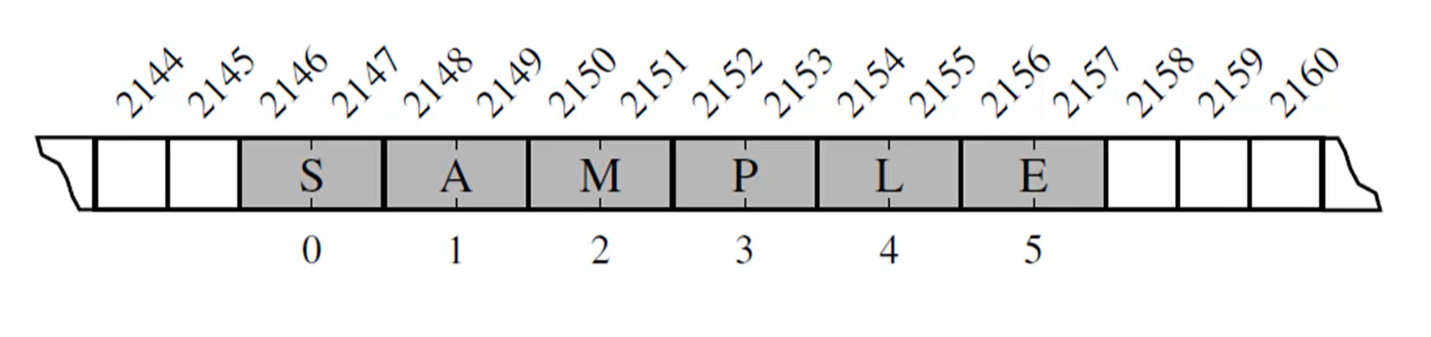

In [5]:
filename = 'string_memory.png'
Image(pics/filename)

* Cell can be accessed in constant time 
* The appropriate memory address can be computed using the calculation ```start + cellsize*index```

## Referential arrays 

* We can use an array of object references to avoid having a series of names
* There may be multiple references to the same object as elements of the list
* A single object can be an element of two or more lists
* When computing the slice of a list, the result is a new list instance with the same references as the original list
* This is a shallow copy
* There is a ```deepcopy``` function that can be found in the ```copy``` module 

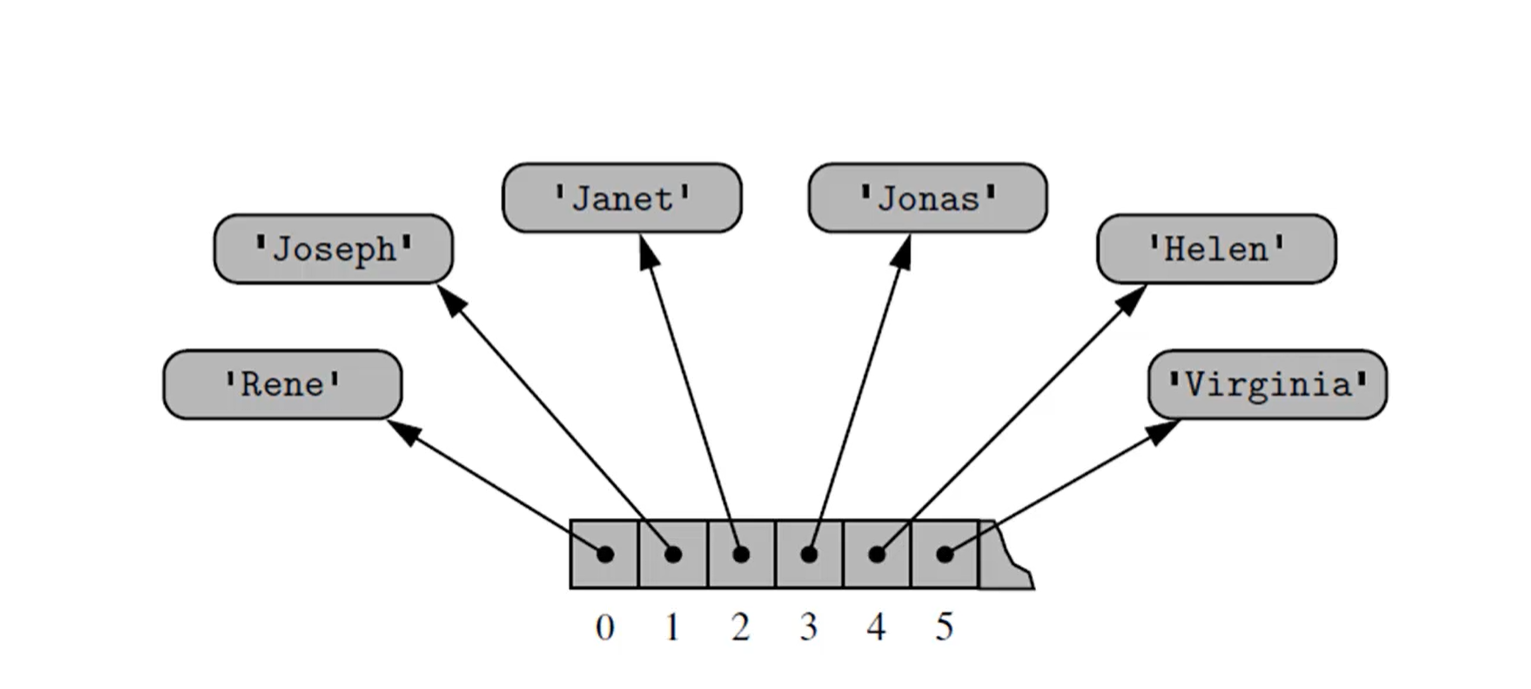

In [6]:
filename = 'reference_array.png'
Image(pics/filename)

In [7]:
# example of referential arrays 
counters = [0]*8 # the integer is immutable

In [8]:
# does not actually copy the integer 
# you are just using the reference to the integer in the counters array
counters[2] +=1
counters

[0, 0, 1, 0, 0, 0, 0, 0]

In [9]:
# add new references to primes list
extra_primes = [23,29,31]
primes = [2,3,5,7,11,13,17,19]
# you are only adding references to the memory addresses of the extra_primes entries
primes.extend(extra_primes)
primes

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31]

## Dynamic arrays

* You don't need to specify the length of the array
* A list instance often has a greater capacity then its current length
* Python adds capacity in chunks

In [11]:
import sys 
import numpy as np

data = []

for i in range(50):
    a = len(data)
    b = sys.getsizeof(data)
    print('Length: {0:3d} ; Size in bytes: {1:4d}'.format(a,b))
    data.append(np.random.choice([-1,1]))

Length:   0 ; Size in bytes:   64
Length:   1 ; Size in bytes:   96
Length:   2 ; Size in bytes:   96
Length:   3 ; Size in bytes:   96
Length:   4 ; Size in bytes:   96
Length:   5 ; Size in bytes:  128
Length:   6 ; Size in bytes:  128
Length:   7 ; Size in bytes:  128
Length:   8 ; Size in bytes:  128
Length:   9 ; Size in bytes:  192
Length:  10 ; Size in bytes:  192
Length:  11 ; Size in bytes:  192
Length:  12 ; Size in bytes:  192
Length:  13 ; Size in bytes:  192
Length:  14 ; Size in bytes:  192
Length:  15 ; Size in bytes:  192
Length:  16 ; Size in bytes:  192
Length:  17 ; Size in bytes:  264
Length:  18 ; Size in bytes:  264
Length:  19 ; Size in bytes:  264
Length:  20 ; Size in bytes:  264
Length:  21 ; Size in bytes:  264
Length:  22 ; Size in bytes:  264
Length:  23 ; Size in bytes:  264
Length:  24 ; Size in bytes:  264
Length:  25 ; Size in bytes:  264
Length:  26 ; Size in bytes:  344
Length:  27 ; Size in bytes:  344
Length:  28 ; Size in bytes:  344
Length:  29 ; 

In [12]:
print(data)

[-1, 1, -1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, -1, -1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, 1, 1]


#### dynamic array implementation
* B is a supporting array with a larger capacity 
* assign references in B to references in A up to n-1
* reassign A to the supporting array B

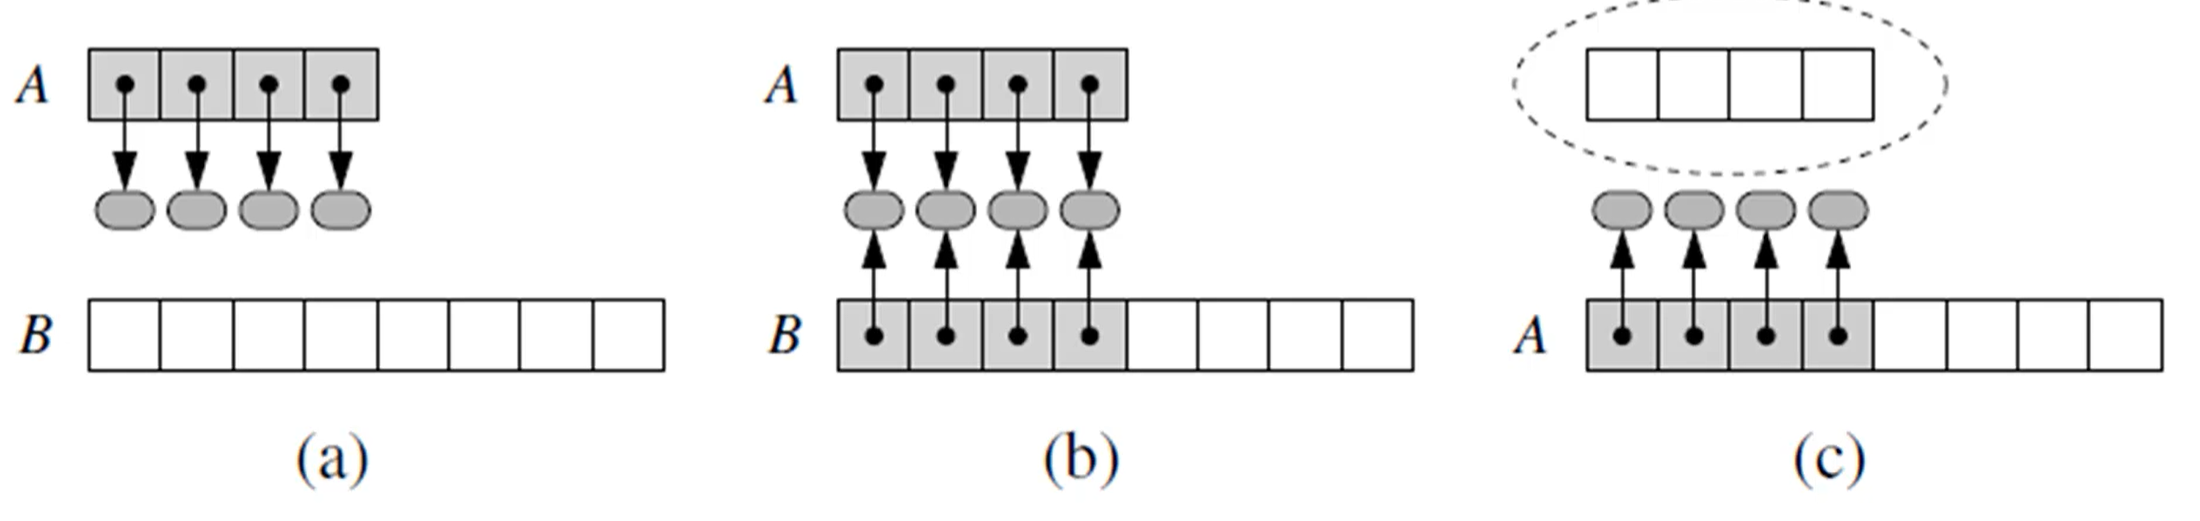

In [13]:
filename = 'dynamic_array.png'
Image(pics/filename)

### Note on private methods in Python 

In [14]:
class M(object):
    
    def public(self):
        print('Use Tab to see me!')
    # these can be used as auxiliary functions     
    def _private(self):
        print("You won't be able to Tab to see me!")

In [15]:
m = M()

In [16]:
m.public()

Use Tab to see me!


In [17]:
m._private()

You won't be able to Tab to see me!


### Dynamic array exercise
___

In [18]:
import ctypes # used to make new array

class DynamicArray(object):
    '''
    DYNAMIC ARRAY CLASS (Similar to Python List)
    '''
    
    def __init__(self):
        self.n = 0 # Count actual elements (Default is 0)
        self.capacity = 1 # Default Capacity
        self.A = self.make_array(self.capacity)
     
    # equivalent to len(arr)     
    def __len__(self):
        """
        Return number of elements sorted in array
        """
        return self.n
    
    # operator overload     
    def __getitem__(self, k):
        """
        Return element at index k
        """
        if not 0 <= k <self.n:
            return IndexError('K is out of bounds!') # Check it k index is in bounds of array
        
        return self.A[k] # Retrieve from array at index k
        
    def append(self, ele):
        """
        Add element to end of the array
        """
        if self.n == self.capacity:
            self._resize(2*self.capacity) # Double capacity if not enough room
        
        self.A[self.n] = ele # Set self.n index to element
        self.n += 1 # add one count to n
        
    def _resize(self, new_cap):
        """
        Resize internal array to capacity new_cap
        """
        
        B = self.make_array(new_cap) # New bigger array
        
        for k in range(self.n): # Reference all existing values
            B[k] = self.A[k]
        
        self.A = B # Call A the new bigger array
        self.capacity = new_cap # Reset the capacity
        
    def make_array(self, new_cap):
        """
        Returns a new array with new_cap capacity
        Grabs the bytes and makes new memory addresses
        """
        return (new_cap * ctypes.py_object)()

#### Experimentation with arrays

In [19]:
from sys import getsizeof

In [20]:
# Instantiate
arr = DynamicArray()

In [21]:
# Append new element
arr.append(1)
print(getsizeof(arr))

56


In [22]:
# Append new element
arr.append(2)
print('length : {:3d}'.format(len(arr)))
print('capacity : {:3d}'.format(arr.capacity))

length :   2
capacity :   2


In [23]:
# Index
arr[0]

1

In [24]:
arr[1]

2

In [25]:
arr.append(3)

In [26]:
# arr.__getitem__(2) is equivalent to arr[2]
print('arr.__getitem__(2): ' , arr.__getitem__(2))
print('arr[2]: ' , arr[2])

arr.__getitem__(2):  3
arr[2]:  3


In [27]:
for j in range(10):
    arr.append(j)
    print('capacity : {:3d}'.format(arr.capacity))

capacity :   4
capacity :   8
capacity :   8
capacity :   8
capacity :   8
capacity :  16
capacity :  16
capacity :  16
capacity :  16
capacity :  16


In [28]:
import ctypes
# getsizeof may not work for custom implementations
# https://www.udemy.com/course/python-for-data-structures-algorithms-and-interviews/learn/lecture/3179592#questions/10835114
getsizeof(arr)

56

### Amortization

* The strategy of replacing an array with a new larger array might seem slow at first 
* Our new array allows us to add n new elements before the array must be replaced again

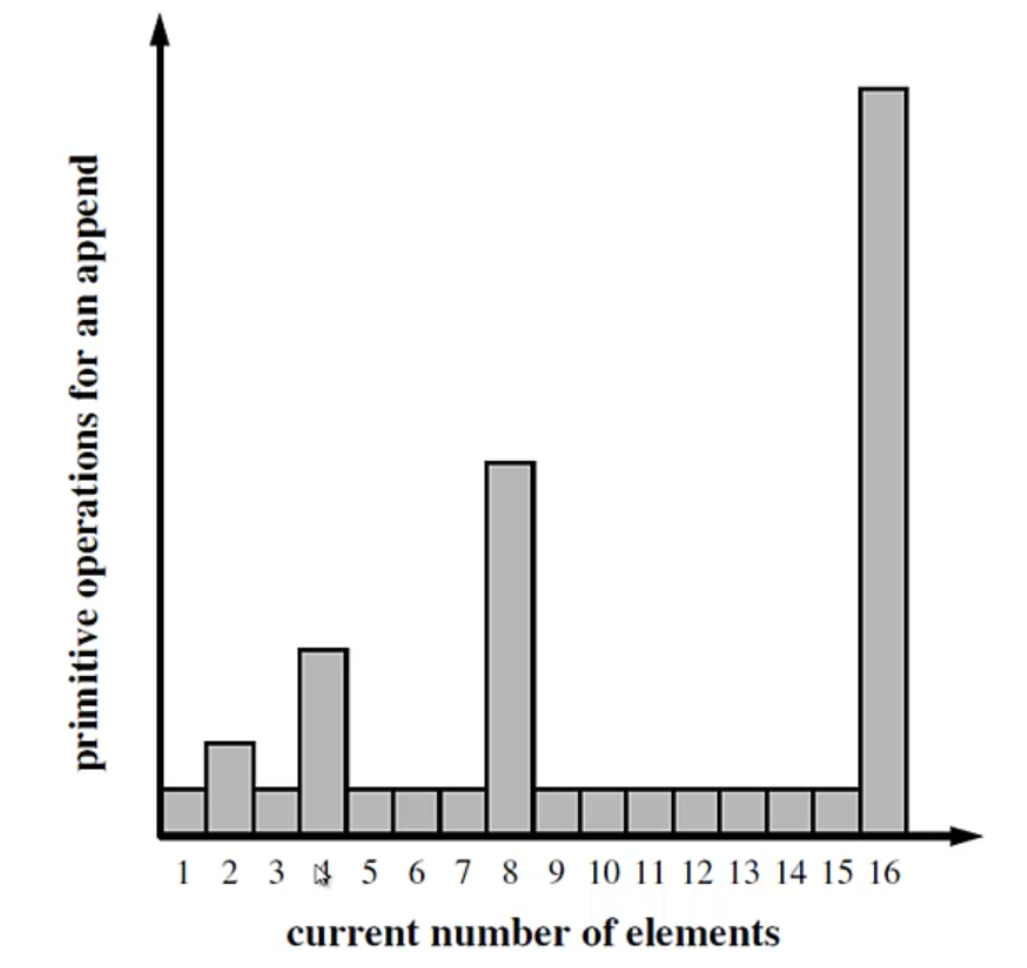

In [29]:
filename = 'amortization.png'
Image(pics/filename)

* Amortized operation cost is the **total number of operations divided by n**
* copying elements costs 1 per item, inserting the new element costs 1

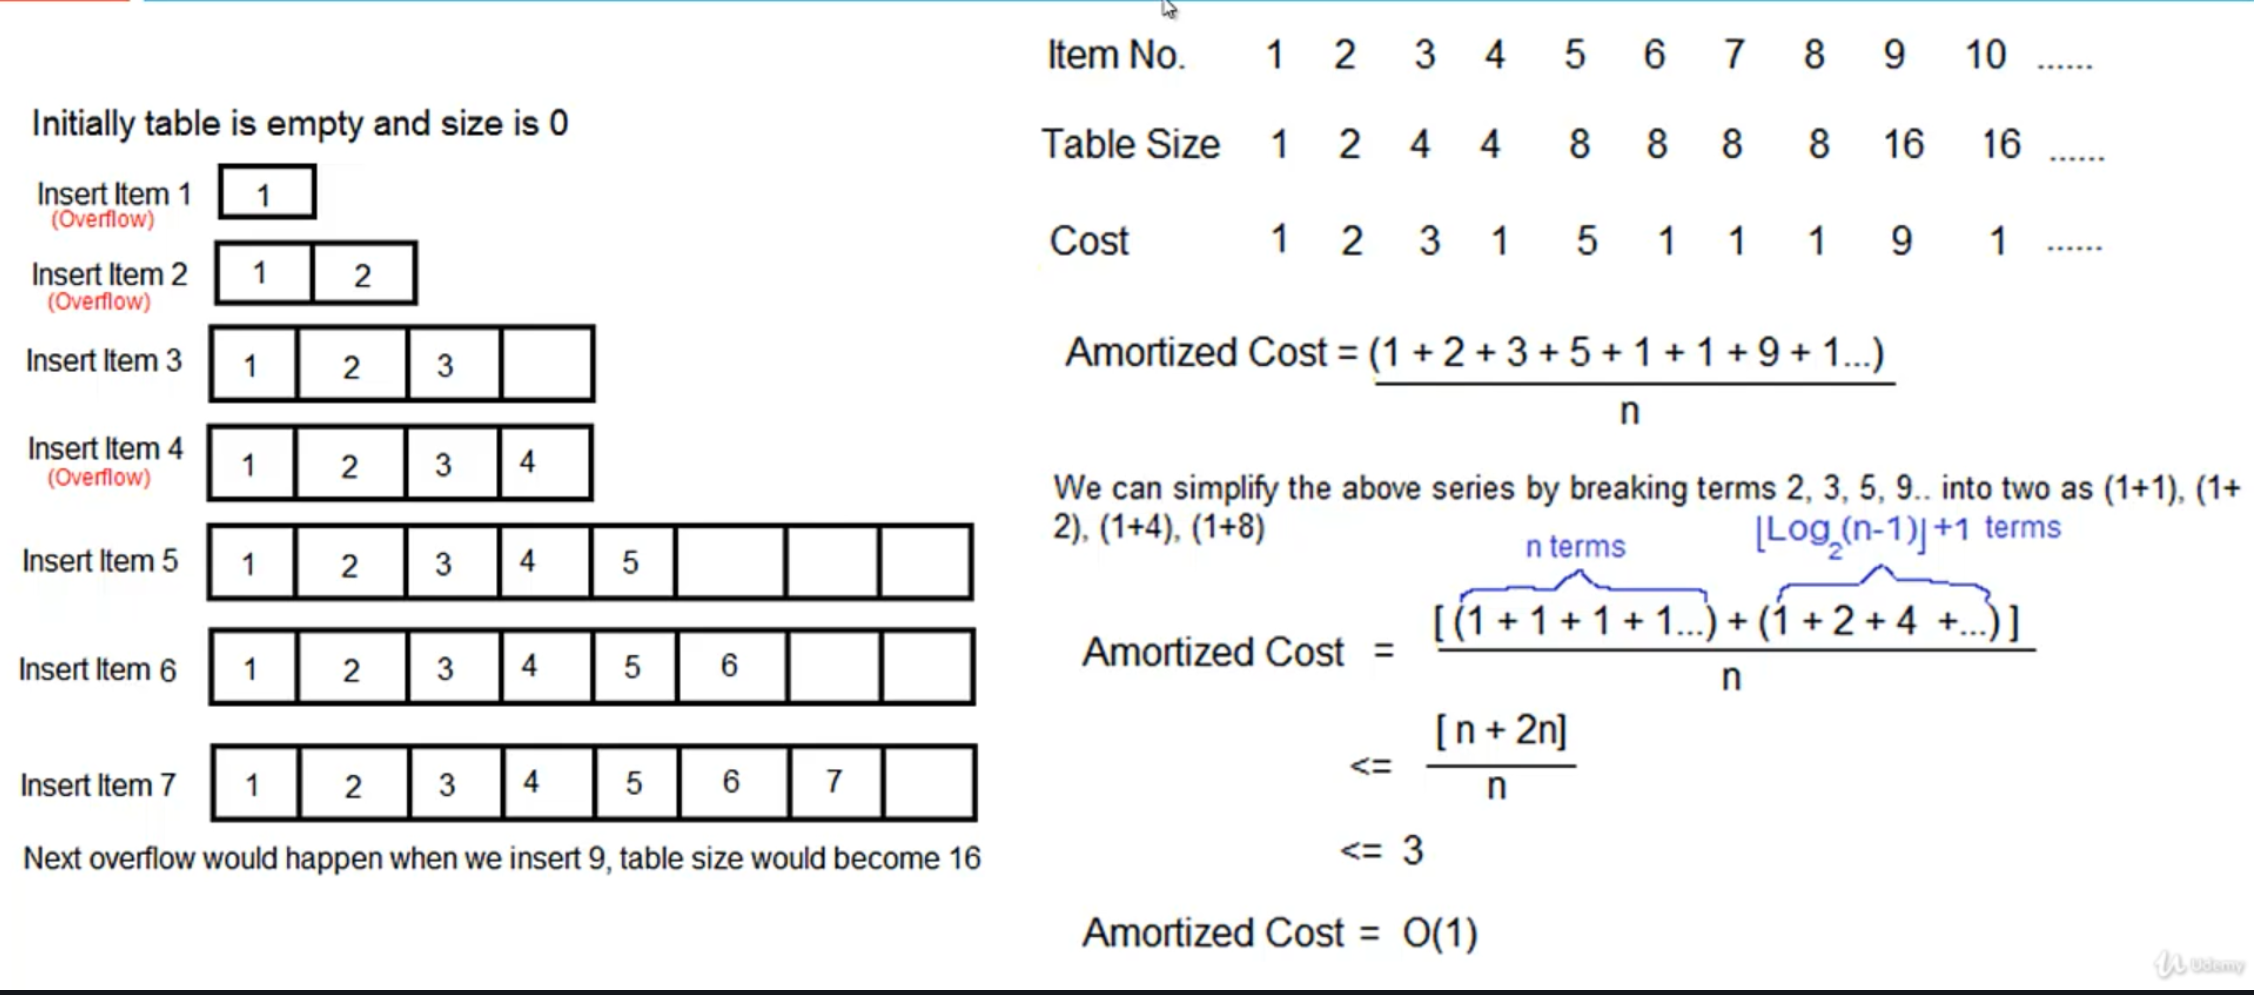

In [30]:
filename = 'amortization_cost.png'
Image(pics/filename)

* [Amortization resource](http://www.cs.cmu.edu/afs/cs/academic/class/15451-s10/www/lectures/lect0203.pdf)

# Array Interview Problems

-----
### Anagram Check - ignore spaces and capitilizations

#### Problem

Given two strings, check to see if they are anagrams. An anagram is when the two strings can be written using the exact same letters (so you can just rearrange the letters to get a different phrase or word). 

For example:

    "public relations" is an anagram of "crap built on lies."
    
    "clint eastwood" is an anagram of "old west action"
    
**Note: Ignore spaces and capitalization. So "d go" is an anagram of "God" and "dog" and "o d g".**

#### Solution

Fill out your solution below:

In [32]:
def anagram(s1,s2):
    # remove and make lower     
    s1 = s1.replace(' ','').lower()
    s2 = s2.replace(' ','').lower()

    return sorted(s1) == sorted(s2) # O(NlogN)

In [34]:
def anagram2(s1,s2):
    
    s1 = s1.replace(' ','').lower() # O(N)
    s2 = s2.replace(' ','').lower() # O(N)
    
    # edge case check     
    if len(s1) != len(s2): # O(1)
        return False 
    
    count = {}
    
    # add letters to count    
    for letter in s1: # O(N)
        if letter in count:
            count[letter] += 1
        else:
            count[letter] = 1
    
    # subtract letters from count     
    for letter in s2: # O(N)
        if letter in count: 
            count[letter] -= 1
        else:
            count[letter] = 1
    
    # if the count is not zero then it must not be an anagram    
    for letter in count: # O(N) overall time complexity
        if count[letter] != 0:
            return False
        
    return True
        

In [35]:
anagram('dog','god')

True

In [36]:
anagram('clint eastwood','old west action')

True

In [37]:
anagram('aa','bb')

False

In [38]:
anagram2('oliver','vilero')

True

In [41]:
# this will eventually perform worse as N increases because T(N) is O(NlogN)
%timeit anagram('clint eastwood','old west action')

6.21 µs ± 289 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [42]:
%timeit anagram2('clint eastwood','old west action')

10.9 µs ± 111 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### Test Your Solution
Run the cell below to test your solution

In [43]:
"""
RUN THIS CELL TO TEST YOUR SOLUTION
"""
from nose.tools import assert_equal

class AnagramTest(object):
    
    def test(self,sol):
        assert_equal(sol('go go go','gggooo'),True)
        assert_equal(sol('abc','cba'),True)
        assert_equal(sol('hi man','hi     man'),True)
        assert_equal(sol('aabbcc','aabbc'),False)
        assert_equal(sol('123','1 2'),False)
        print("ALL TEST CASES PASSED")

# Run Tests
t = AnagramTest()
t.test(anagram)

ALL TEST CASES PASSED


In [44]:
t.test(anagram2)

ALL TEST CASES PASSED


---
### Array Pair Sum

#### Problem

Given an integer array, output all the **unique** pairs that sum up to a specific value **k**.

So the input:
    
    pair_sum([1,3,2,2],4)

would return **2** pairs:

     (1,3)
     (2,2)

**NOTE: FOR TESTING PURPOSES CHANGE YOUR FUNCTION SO IT OUTPUTS THE NUMBER OF PAIRS**

#### Solution

The O(N) algorithm uses the set data structure. We perform a linear pass from the beginning and for each element we check whether k-element is in the set of seen numbers. If it is, then we found a pair of sum k and add it to the output. If not, this element doesn’t belong to a pair yet, and we add it to the set of seen elements.

The algorithm is really simple once we figure out using a set. The complexity is O(N) because we do a single linear scan of the array, and for each element we just check whether the corresponding number to form a pair is in the set or add the current element to the set. Insert and find operations of a set are both average O(1), so the algorithm is O(N) in total.

In [48]:
def pair_sum(arr,k):
    
    # edge case check
    if len(arr)<2:
        return ValueError('There are no pairs in an array with length 1')
    
    # sets for tracking are great for changing quadratic
    # complexity to linear
    seen = set()
    output = set()
    
    for num in arr: # O(N)
        target = k-num
        # you only need to keep track of one number - the difference
        # ensures unique pairs
        if num not in seen:
            seen.add(target)
        else:              
            output.add( (min(num,target), max(num,target)) )
#     print('\n'.join(map(str,list(output))))
    return len(output)
    

In [49]:
pair_sum([1],3)

ValueError('There are no pairs in an array with length 1')

In [50]:
pair_sum([1,3,2,2,3],4)

2

#### Test Your Solution

In [51]:
"""
RUN THIS CELL TO TEST YOUR SOLUTION
"""
from nose.tools import assert_equal

class TestPair(object):
    
    def test(self,sol):
        assert_equal(sol([1,9,2,8,3,7,4,6,5,5,13,14,11,13,-1],10),6)
        assert_equal(sol([1,2,3,1],3),1)
        assert_equal(sol([1,3,2,2],4),2)
        print('ALL TEST CASES PASSED')
        
#Run tests
t = TestPair()
t.test(pair_sum)
    

ALL TEST CASES PASSED


---
## Find the Missing Element

## Problem

Consider an array of non-negative integers. A second array is formed by shuffling the elements of the first array and deleting a random element. Given these two arrays, find which element is missing in the second array. 

Here is an example input, the first array is shuffled and the number 5 is removed to construct the second array.

Input:
    
    finder([1,2,3,4,5,6,7],[3,7,2,1,4,6])

Output:

    5 is the missing number

## Solution

The naive solution is go through every element in the second array and check whether it appears in the first array. Note that there may be duplicate elements in the arrays so we should pay special attention to it. The complexity of this approach is O(N^2), since we would need two for loops.

A more efficient solution is to sort the first array, so while checking whether an element in the first array appears in the second, we can do binary search (we'll learn about binary search in more detail in a future section). But we should still be careful about duplicate elements. The complexity is O(NlogN). 

If we don’t want to deal with the special case of duplicate numbers, we can sort both arrays and iterate over them simultaneously. Once two iterators have different values we can stop. The value of the first iterator is the missing element. This solution is also O(NlogN). Here is the solution for this approach:

In [52]:
def finder(arr1,arr2):
    
    # Overall time complexity -> 2NlogN + N -> O(NlogN)
    # Sort the arrays
    arr1.sort() #NlogN
    arr2.sort() #NlogN 
    
    # Compare elements in the sorted arrays
    for num1, num2 in zip(arr1,arr2): # N 
        if num1!= num2:
            return num1
    
    # Otherwise no elements have been deleted
    print('Elements are common in both arrays')
    return arr1[-1]

In [53]:
arr1 = [1,2,3,4,5,6,7]
arr2 = [3,7,2,1,4,6]
finder(arr1,arr2)

5

In most interviews, you would be expected to come up with a linear time solution. We can use a hashtable and store the number of times each element appears in the second array. Then for each element in the first array we decrement its counter. Once we hit an element with zero count that’s the missing element. Here is this solution: 

In [54]:
# init entries to int 0
import collections
d = collections.defaultdict(int)
d['olli']+=1
d

defaultdict(int, {'olli': 1})

In [55]:
import collections

def finder2(arr1, arr2): 
    
    # Using default dict to avoid key errors
    # initialize a dictionary with 0
    d=collections.defaultdict(int) 
    
    # linear time -> 2N+1 -> O(N) time complexity     
    # Add a count for every instance in Array 2
    for num in arr2:
        d[num]+=1 
    
    # Check if num not in dictionary
    # check arr1 after because the number is removed in arr2
    for num in arr1: 
        if d[num]==0: 
            return num 
        # Otherwise, subtract a count
        else: 
            d[num]-=1 

In [60]:
arr1 = [5,5,7,7]
arr2 = [5,7,7]

finder2(arr1,arr2)

5

One possible solution is computing the sum of all the numbers in arr1 and arr2, and subtracting arr2’s sum from array1’s sum. The difference is the missing number in arr2. However, this approach could be problematic if the arrays are too long, or the numbers are very large. Then overflow will occur while summing up the numbers.

By performing a very clever trick, we can achieve linear time and constant space complexity without any problems. Here it is: initialize a variable to 0, then [XOR](https://en.wikipedia.org/wiki/Exclusive_or) every element in the first and second arrays with that variable. In the end, the value of the variable is the result, missing element in array2.

In [61]:
# concatenate the arrays 
arr1+arr2

[5, 5, 7, 7, 5, 7, 7]

In [62]:
def finder3(arr1, arr2): 
    result=0 
    
    # Perform an XOR between the numbers in the arrays
    # XOR is good for pairs
    for num in arr1+arr2: # O(N) time complexity 
        result^=num 
        
    return result 

In [63]:
finder3(arr1,arr2)

5

# Test Your Solution

In [64]:
"""
RUN THIS CELL TO TEST YOUR SOLUTION
"""
from nose.tools import assert_equal

class TestFinder(object):
    
    def test(self,sol):
        assert_equal(sol([5,5,7,7],[5,7,7]),5)
        assert_equal(sol([1,2,3,4,5,6,7],[3,7,2,1,4,6]),5)
        assert_equal(sol([9,8,7,6,5,4,3,2,1],[9,8,7,5,4,3,2,1]),6)
        print('ALL TEST CASES PASSED')

# Run test
t = TestFinder()
t.test(finder2)

ALL TEST CASES PASSED


---
## Largest Continuous Sum

## Problem
Given an array of integers (positive and negative) find the largest continuous sum. 

## Solution

If the array is all positive, then the result is simply the sum of all numbers. The negative numbers in the array will cause us to need to begin checking sequences.  

The algorithm is, we start summing up the numbers and store in a current sum variable. After adding each element, we check whether the current sum is larger than maximum sum encountered so far. If it is, we update the maximum sum. As long as the current sum is positive, we keep adding the numbers. When the current sum becomes negative, we start with a new current sum. Because a negative current sum will only decrease the sum of a future sequence. Note that we don’t reset the current sum to 0 because the array can contain all negative integers. Then the result would be the largest negative number. 

Let's see the code:

In [65]:
def large_cont_sum(arr): 
    
    # Check to see if array is length 0
    if len(arr) == 0: 
        return 0
    
    # Start the max and current sum at the first element
    max_sum = current_sum = arr[0] 
    
    # For every element in array
    for num in arr[1:]: 
        
        # Set current sum as the higher of the two
        # don't count a negative sum         
        current_sum = max(current_sum + num, num)
        # Set max as the higher between the currentSum and the current max
        max_sum = max(current_sum, max_sum)
        
    return max_sum 

In [66]:
# test case
large_cont_sum([1,2,-1,3,4,10,10,-10,-1])

29

Many times in an interview setting the question also requires you to report back the start and end points of the sum. Keep this in mind and see if you can solve that problem, we'll see it in the mock interview section of the course!

# Test Your Solution

In [67]:
from nose.tools import assert_equal

class LargeContTest(object):
    def test(self,sol):
        assert_equal(sol([1,2,-1,3,4,-1]),9)
        assert_equal(sol([1,2,-1,3,4,10,10,-10,-1]),29)
        assert_equal(sol([-1,1]),1)
        print('ALL TEST CASES PASSED')
        
#Run Test
t = LargeContTest()
t.test(large_cont_sum)

ALL TEST CASES PASSED


---
## Sentence Reversal

## Problem

Given a string of words, reverse all the words. For example:

Given:
    
    'This is the best'

Return:

    'best the is This'

As part of this exercise you should remove all leading and trailing whitespace. So that inputs such as:

    '  space here'  and 'space here      '

both become:

    'here space'

## Solution

We could take advantage of Python's abilities and solve the problem with the use of **split()** and some slicing or use of **reversed**:

In [68]:
def rev_word1(s):
    return " ".join(reversed(s.split()))

# Or

def rev_word2(s):
    return " ".join(s.split()[::-1])

In [69]:
rev_word1('Hi John,   are you ready to go?')

'go? to ready you are John, Hi'

In [70]:
rev_word2('Hi John,   are you ready to go?')

'go? to ready you are John, Hi'

While these are valid solutions, in an interview setting you'll have to work out the basic algorithm that is used. In this case what we want to do is loop over the text and extract words form the string ourselves. Then we can push the words to a "stack" and in the end pop them all to reverse. Let's see what this actually looks like:

In [109]:
def splitter(s):
    """
    Manually doing the splits on the spaces.
    """
    
    words = []
    length = len(s)
    spaces = [' ']
    
    # Index Tracker
    i = 0
    
    # While index is less than length of string
    while i < length:
#         print('top of while loop')
        # If element isn't a space
        if s[i] not in spaces:
            
            # The word starts at this index
            word_start = i
            # keep track of spaces 
#             print(s[i])
#             print('start of word')
            while i < length and s[i] not in spaces:
                # Get index where word ends
                i += 1
#                 print(f'i-value : {i} in a word')
            # Append that word to the list
            words.append(s[word_start:i])
#             print(s[i-1])
#             print('end of word')
        # Add to index
        i += 1
#         print(f'i-value : {i} spaces')
    # Join the reversed words
    return words

def rev_word3(s):
    # split the words      
    words = splitter(s)
    # initiate variables
    i = - 1
    reversed_words = []
    while i >= -len(words):
        reversed_words.append(words[i])
        i -= 1
    return " ".join(reversed_words)

In [110]:
rev_word3('   Hello John    how are you   ')

'you are how John Hello'

In [111]:
rev_word3('    space before')

'before space'

If you want you can further develop this solution so its all manual, you can create your own reversal function.

# Test Your Solution

In [112]:
"""
RUN THIS CELL TO TEST YOUR SOLUTION
"""

from nose.tools import assert_equal

class ReversalTest(object):
    
    def test(self,sol):
        assert_equal(sol('    space before'),'before space')
        assert_equal(sol('space after     '),'after space')
        assert_equal(sol('   Hello John    how are you   '),'you are how John Hello')
        assert_equal(sol('1'),'1')
        print("ALL TEST CASES PASSED")
        
# Run and test
t = ReversalTest()
t.test(rev_word1)

ALL TEST CASES PASSED


---
## String Compression

## Problem

Given a string in the form 'AAAABBBBCCCCCDDEEEE' compress it to become 'A4B4C5D2E4'. For this problem, you can falsely "compress" strings of single or double letters. For instance, it is okay for 'AAB' to return 'A2B1' even though this technically takes more space. 

The function should also be case sensitive, so that a string 'AAAaaa' returns 'A3a3'.

## Solution
Since Python strings are immutable, we'll need to work off of a list of characters, and at the end convert that list back into a string with a **join** statement.

The solution below should yield us with a Time and Space complexity of O(n). Let's take a look with careful attention to the explanatory comments:

In [113]:
def compress(s):
    """
    This solution compresses without checking. Known as the RunLength Compression algorithm.
    """
    
    # Begin Run as empty string
    r = ""
    l = len(s)
    
    # Check for length 0
    if l == 0:
        return ""
    
    # Check for length 1
    if l == 1:
        return s + "1"
    
    #Intialize Values
    last = s[0]
    cnt = 1
    i = 1
    
    while i < l:
        last = s[i - 1]
        # Check to see if it is the same letter
        if s[i] == last: 
            # Add a count if same as previous
            cnt += 1
        else:
            # Otherwise store the previous data
            r = r + last + str(cnt)
            # reset count
            cnt = 1
            
        # Add to i value to terminate while loop
        i += 1
    
    # Put everything back into run
    r = r + s[i - 1] + str(cnt)
    
    return r

In [114]:
compress('AAAAABBBBCCCCD')

'A5B4C4D1'

# Test Your Solution

In [115]:
"""
RUN THIS CELL TO TEST YOUR SOLUTION
"""
from nose.tools import assert_equal

class TestCompress(object):

    def test(self, sol):
        assert_equal(sol(''), '')
        assert_equal(sol('AABBCC'), 'A2B2C2')
        assert_equal(sol('AAABCCDDDDD'), 'A3B1C2D5')
        print('ALL TEST CASES PASSED')

# Run Tests
t = TestCompress()
t.test(compress)

ALL TEST CASES PASSED


# Unique Characters in String

## Problem
Given a string, determine if it is comprised of all unique characters. For example, the string 'abcde' has all unique characters and should return True. The string 'aabcde' contains duplicate characters and should return false.

## Solution
We'll show two possible solutions, one using a built-in data structure and a built in function, and another using a built-in data structure but using a look-up method to check if the characters are unique.

In [116]:
def uni_char(s):
    return len(set(s)) == len(s)

In [117]:
def uni_char2(s):
    chars = set()
    for let in s:
        # Check if in set
        if let in chars:
            return False
        else:
            # it will only add the letter once
            chars.add(let)
    return True

# Test Your Solution

In [118]:
"""
RUN THIS CELL TO TEST YOUR CODE>
"""
from nose.tools import assert_equal


class TestUnique(object):

    def test(self, sol):
        assert_equal(sol(''), True)
        assert_equal(sol('goo'), False)
        assert_equal(sol('abcdefg'), True)
        print('ALL TEST CASES PASSED')
        
# Run Tests
t = TestUnique()
t.test(uni_char)

ALL TEST CASES PASSED
